# Accessibility Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Polygon

In [56]:
#loading dataframes
entrance_df = pd.read_json('entrance_score.json', orient='index')
centroid_df = pd.read_json('centroid_score.json', orient='index')
entrance_df.head(20)

name     Einwohner    Alter_D  unter18_A     ab65_A   
0                   Alsenpark   9072.626025  38.776610  14.490263  12.280133  \
1    Alsterpark Klein Borstel  16405.127587  42.883331  17.225356  20.601010   
2               Alstervorland  19308.654830  43.763220  13.388264  20.745299   
3    Alter Botanischer Garten   1878.298928  39.834559  10.462172  13.310552   
4               Alter Elbpark   8853.092696  39.792623  11.069085  12.247264   
5      Alter Friedhof Harburg   7364.197945  38.197029  15.530829  14.015435   
6   Alter Friedhof Lohbruegge   4217.909900  42.300461  16.020837  20.392374   
7             Altonaer Balkon   6793.960746  39.681293  10.623403  10.166289   
8                 Amsinckpark   2694.382893  45.247206  13.758561  24.887745   
9             Appelhoffweiher   8008.169536  42.530437  13.655773  19.650891   
10       August-Luetgens-Park   7460.239226  37.790028  14.982703  10.314552   
11                Ballin Park   1588.003235  34.626116  18.804317   8.204894   
12                 Baurs Park   1820.509712  46.041988  15.000811  28.167149   
13    Bergedorfer Rathauspark   5104.723319  43.223016  14.985065  21.222076   
14  Bergedorfer Schlossgarten   3834.943562  41.971100  15.101881  19.023812   
15            Berner Gutspark   4373.274723  43.732204  17.487279  22.983924   
16            Biedermannplatz   7672.409060  41.551124   9.817766  16.328937   
17              Bismarckstein   1186.264416  47.142146  15.643165  27.873059   
18                Blohms Park   6043.226790  40.127533  11.659734  15.308475   
19               Boeverstpark   5006.952186  40.109927  19.599043  16.830636   

    Auslaender_A  HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
0      18.304357     1.845922         0.987105     34.301941     61.099637  \
1       7.610585     2.024599         1.927127     42.887445     86.951816   
2      10.269647     1.744966         3.034436     42.497621     67.960304   
3      22.300744     1.661962         2.560311     37.518629     61.964251   
4      19.920892     1.675982         1.853271     36.458210     58.334004   
5      25.761610     1.825899         1.917636     33.342656     57.449780   
6      11.458404     1.874853         1.113743     36.222687     65.890336   
7      33.013449     1.830831         7.060510     37.043755     64.319254   
8       8.924162     1.831235         1.247738     40.703747     73.032463   
9      11.770594     1.810525         2.943547     35.976233     62.427536   
10     17.728936     1.853964         1.698987     34.021342     61.151593   
11     42.506945     2.208452         2.344155     27.572466     55.408080   
12      6.408743     1.998059         3.273867     48.719569     92.124276   
13      6.854608     1.842315         2.089516     41.631435     74.531224   
14      8.210233     1.825796         2.206975     41.209069     70.601253   
15      7.823601     2.145301         0.891120     37.893405     73.861876   
16     10.342087     1.556847         1.334946     37.728771     57.758214   
17      5.238420     2.149596         4.653443     55.592196    103.998615   
18     19.806983     1.670142         1.476293     34.085162     56.420504   
19     13.183434     2.260129         1.636864     37.882666     72.852860   

    census_blocks  size_ha  walk_dist  size_m2  park_pop_ratio   
0               5   1.6005        500    16005        1.764098  \
1              11  27.2419       1000   272419       16.605723   
2               8  13.7983       1000   137983        7.146174   
3               6   7.9442        500    79442       42.294652   
4               4   5.0377        500    50377        5.690328   
5               4   6.1387        500    61387        8.335870   
6               4   2.0620        500    20620        4.888677   
7               4   5.0674        500    50674        7.458683   
8               4   5.5485        500    55485       20.592842   
9               5   4.9661        500    4966

In [52]:
entrance_df.describe()

Einwohner     Alter_D   unter18_A      ab65_A  Auslaender_A   
count    118.000000  118.000000  118.000000  118.000000    118.000000  \
mean    6786.653512   41.966075   14.654209   18.716985     13.682908   
std     5996.845675    2.804677    2.926197    5.490723      7.876732   
min       32.863831   33.191809    7.144600    6.644286      4.004465   
25%     2530.744036   40.114328   12.643793   14.469067      7.961613   
50%     5508.690071   41.945448   14.946435   18.586194     11.310927   
75%     9111.008567   43.857977   16.712655   22.761226     17.982779   
max    30269.565597   49.485456   21.747413   35.347258     42.506945   

       HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
count   118.000000       118.000000    118.000000    118.000000  \
mean      1.932654         2.164613     40.005121     66.801093   
std       0.246305         1.441616      8.017282     18.254366   
min       1.516718         0.036113     14.025445      0.000000   
25%       1.774159         1.261239     36.436329     59.824203   
50%       1.879658         1.764143     38.536714     67.641728   
75%       2.064359         2.543555     42.623120     74.499973   
max       2.869338         8.454797     93.340039    110.671541   

       census_blocks     size_ha    walk_dist        size_m2  park_pop_ratio   
count     118.000000  118.000000   118.000000     118.000000      118.000000  \
mean        5.584746    7.993298   618.644068   79932.983051       36.569664   
std         2.619213    9.228933   213.617260   92289.328211      123.440444   
min         2.000000    1.018700   500.000000   10187.000000        1.314109   
25%         4.000000    2.437325   500.000000   24373.250000        5.129883   
50%         4.000000    4.783000   500.000000   47830.000000        9.844684   
75%         6.750000    9.597975   500.000000   95979.750000       22.534613   
max        13.000000   55.277000  1000.000000  552770.000000     1082.344898   

       acc_score_blocks  
count        118.000000  
mean           4.395372  
std            6.802052  
min            0.328527  
25%            1.049640  
50%            1.816801  
75%            4.102696  
max           30.000000

In [53]:
centroid_df.describe()

Einwohner     Alter_D   unter18_A      ab65_A  Auslaender_A   
count    118.000000  118.000000  118.000000  118.000000    118.000000  \
mean    3023.662655   41.949750   14.660208   18.563508     13.627398   
std     2879.566783    3.022316    3.330528    5.775248      8.550157   
min       13.144552   28.263527    4.995749    5.496306      3.280468   
25%     1236.354198   40.210386   12.848592   14.181718      8.023678   
50%     2260.297310   41.791740   15.056795   18.692035     11.191022   
75%     4034.304469   44.063458   16.619428   22.328843     17.417235   
max    16955.228474   49.897401   22.098242   36.081777     48.773285   

       HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
count   118.000000       118.000000    118.000000    118.000000  \
mean      1.935160         2.152429     39.885384     61.095996   
std       0.262059         1.792669     10.639161     25.523675   
min       1.361631         0.000000      0.000000      0.000000   
25%       1.757198         1.147675     35.935155     58.143734   
50%       1.885680         1.678847     38.195222     66.361905   
75%       2.100661         2.386855     42.174063     73.924169   
max       2.876390        11.559742     93.339023    112.777897   

       census_blocks     size_ha    walk_dist        size_m2  park_pop_ratio   
count     118.000000  118.000000   118.000000     118.000000      118.000000  \
mean        3.779661    7.993298   618.644068   79932.983051      119.199718   
std         1.536650    9.228933   213.617260   92289.328211      365.077596   
min         1.000000    1.018700   500.000000   10187.000000        1.880774   
25%         3.000000    2.437325   500.000000   24373.250000        9.136023   
50%         4.000000    4.783000   500.000000   47830.000000       20.705384   
75%         4.000000    9.597975   500.000000   95979.750000       63.034695   
max         8.000000   55.277000  1000.000000  552770.000000     2706.064027   

       acc_score_blocks  
count        118.000000  
mean          14.081830  
std           16.566035  
min            0.589196  
25%            2.646768  
50%            6.655378  
75%           17.828110  
max           50.000000

## Entrance Approach

In [3]:
entrance_acc_score = entrance_df["acc_score_blocks"]
entrance_age = entrance_df["Alter_D"]
entrance_u18 = entrance_df["unter18_A"]
entrance_o65 = entrance_df["ab65_A"]
entrance_immigrants = entrance_df["Auslaender_A"]
entrance_hh_persons = entrance_df["HHGroesse_D"]
entrance_vacancy_share = entrance_df["Leerstandsquote"]
entrance_flatsize_resident = entrance_df["Wohnfl_Bew_D"]
entrance_flatsize_flat = entrance_df["Wohnfl_Whg_D"]


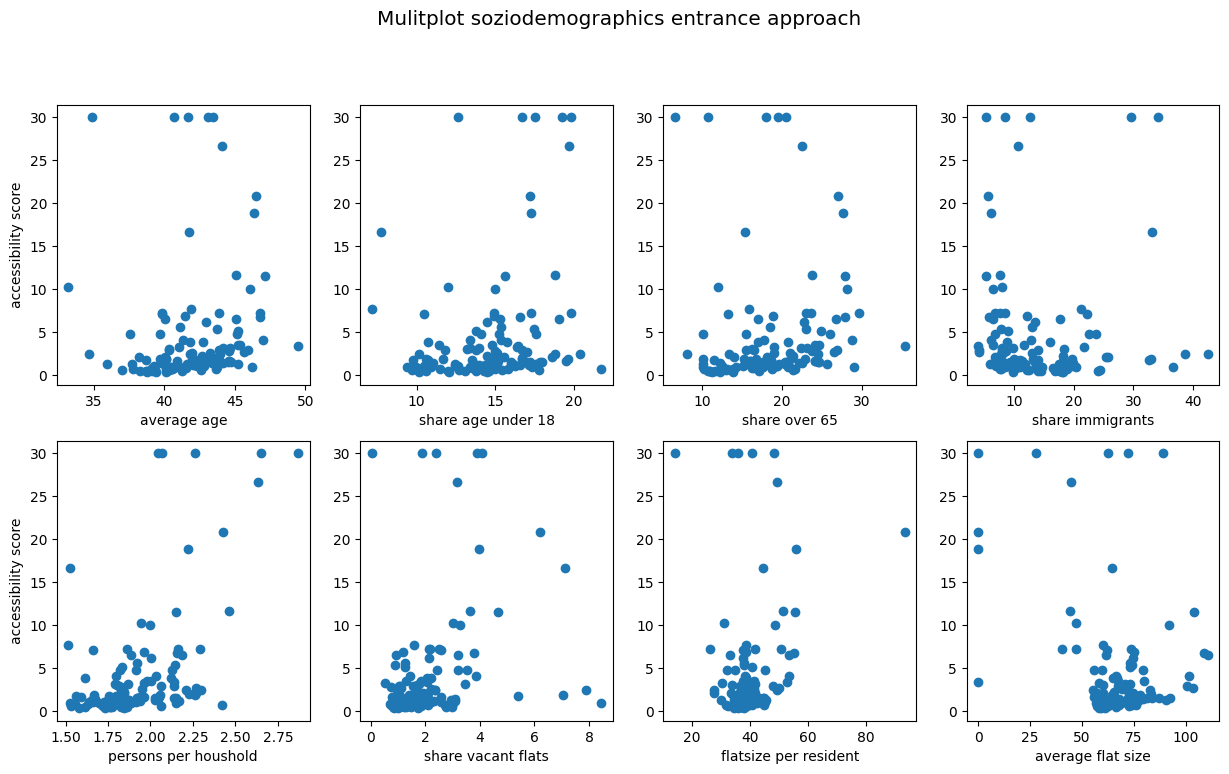

In [4]:
# plotting
fig, ax = plt.subplots(2, 4,figsize=(15, 8))
fig.suptitle("Mulitplot soziodemographics entrance approach", fontsize="x-large", ha = "center", va = "baseline")


ax[0, 0].scatter(entrance_age,entrance_acc_score)
ax[0, 0].set_ylabel('accessibility score')
ax[0, 0].set_xlabel('average age')

ax[0, 1].scatter(entrance_u18,entrance_acc_score)
#ax[0, 1].set_ylabel('accessibility score')
ax[0, 1].set_xlabel('share age under 18')

ax[0, 2].scatter(entrance_o65,entrance_acc_score)
#ax[0, 2].set_ylabel('accessibility score')
ax[0, 2].set_xlabel('share over 65')

ax[0, 3].scatter(entrance_immigrants,entrance_acc_score)
#ax[0, 3].set_ylabel('accessibility score')
ax[0, 3].set_xlabel('share immigrants')

ax[1, 0].scatter(entrance_hh_persons,entrance_acc_score)
ax[1, 0].set_ylabel('accessibility score')
ax[1, 0].set_xlabel('persons per houshold')

ax[1, 1].scatter(entrance_vacancy_share,entrance_acc_score)
#ax[1, 1].set_ylabel('accessibility score')
ax[1, 1].set_xlabel('share vacant flats')

ax[1, 2].scatter(entrance_flatsize_resident,entrance_acc_score)
#ax[1, 2].set_ylabel('accessibility score')
ax[1, 2].set_xlabel('flatsize per resident')

ax[1, 3].scatter(entrance_flatsize_flat,entrance_acc_score)
#ax[1, 3].set_ylabel('accessibility score')
ax[1, 3].set_xlabel('average flat size')

plt.show()

In [5]:
entrance_corr_df = entrance_df.copy()
entrance_corr_df = entrance_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])
entrance_corr = entrance_corr_df.corr()

## Centroid Approach

In [7]:
centroid_corr_df = centroid_df.copy()
centroid_corr_df = centroid_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])

In [8]:
centroid_corr = centroid_corr_df.corr()

## Plotting the correlation matrix

Text(0.5, 1.0, 'Correlation Heatmap Entrance Approach')

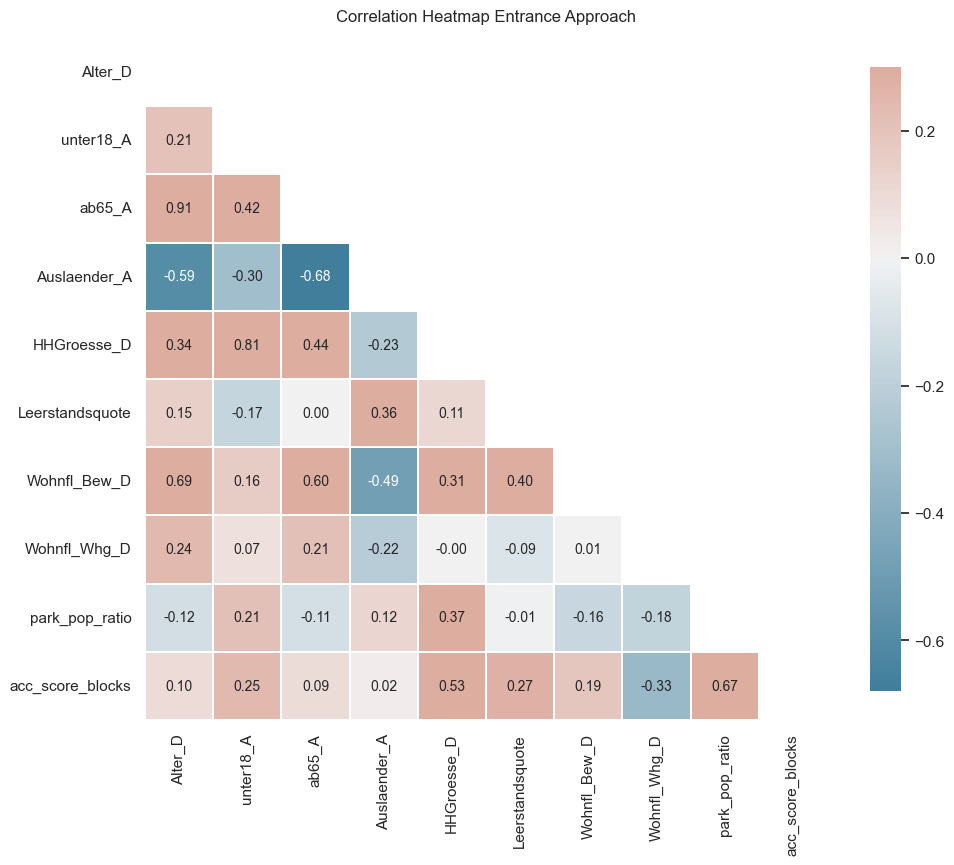

In [9]:
# entrance correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(entrance_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

heatmap = sns.heatmap(entrance_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Entrance Approach', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap Centroid Approach')

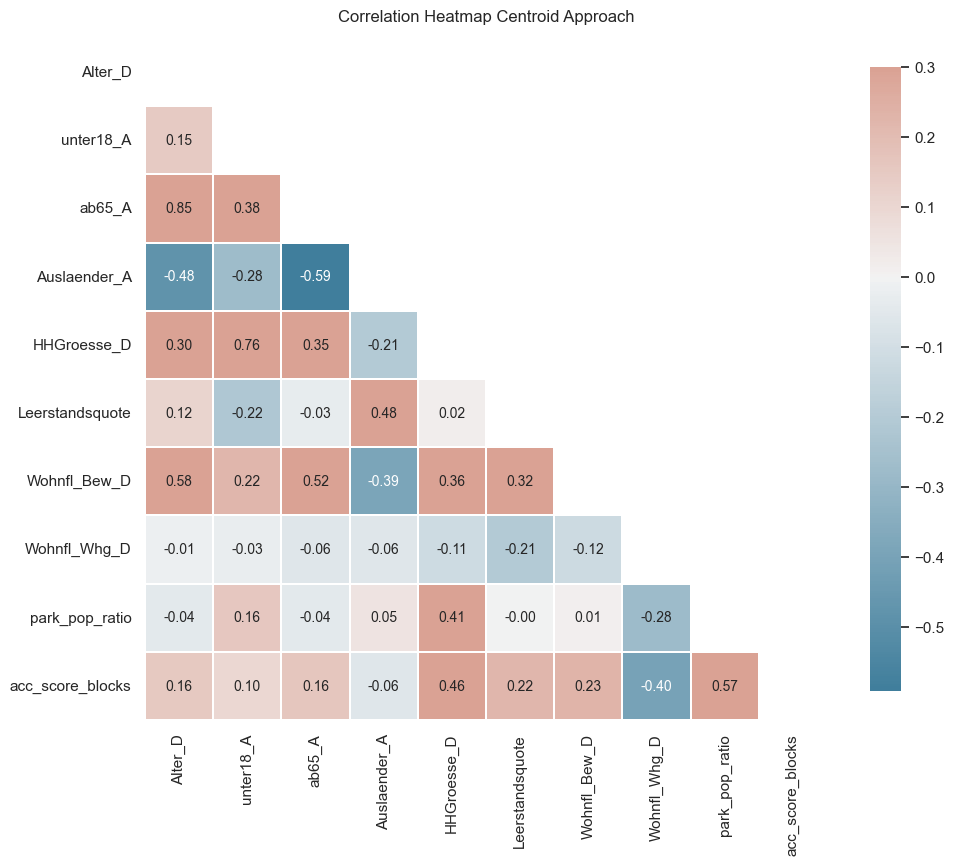

In [10]:
# centroid correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(centroid_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(centroid_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Centroid Approach', fontdict={'fontsize':12}, pad=12)

## Summary

In [55]:
pop_entrance = entrance_df["Einwohner"].sum()
pop_centroid = centroid_df["Einwohner"].sum()
centroid_corr_score = centroid_corr_df.corr()[["acc_score_blocks"]]
entrance_corr_score = entrance_corr_df.corr()[["acc_score_blocks"]]
entrance_corr_score = entrance_corr_score.rename({"acc_score_blocks": "entrance_approach"}, axis = 'columns')
centroid_corr_score = centroid_corr_score.rename({"acc_score_blocks": "centroid_approach"}, axis = 'columns')

summary = centroid_corr_score.join(entrance_corr_score)
summary["difference"] = summary["centroid_approach"]-summary["entrance_approach"]
print("Summary walking distance based on park size")
print("_____________________________________________")
print(f"Population Centroid Approach: {pop_centroid}")
print(f"Population Entrance Approach: {pop_entrance}")
summary


Summary walking distance based on park size
_____________________________________________
Population Centroid Approach: 356792.1933355303
Population Entrance Approach: 800825.1144676993


centroid_approach  entrance_approach  difference
Alter_D                    0.157154           0.100627    0.056528
unter18_A                  0.097487           0.245354   -0.147868
ab65_A                     0.162752           0.089680    0.073072
Auslaender_A              -0.055704           0.024442   -0.080146
HHGroesse_D                0.458018           0.534026   -0.076008
Leerstandsquote            0.221516           0.274854   -0.053338
Wohnfl_Bew_D               0.231119           0.186750    0.044369
Wohnfl_Whg_D              -0.404009          -0.330740   -0.073269
park_pop_ratio             0.566810           0.674057   -0.107247
acc_score_blocks           1.000000           1.000000    0.000000

## 500m walking distance for all

In [12]:
#loading dataframes
entrance_500_df = pd.read_json('entrance_500_score.json', orient='index')
centroid_500_df = pd.read_json('centroid_500_score.json', orient='index')
entrance_500_df

name     Einwohner    Alter_D  unter18_A     ab65_A   
0                   Alsenpark   9072.626025  38.776610  14.490263  12.280133  \
1    Alsterpark Klein Borstel   6026.504194  42.474464  18.462703  20.262736   
2               Alstervorland   6247.377232  44.973024  12.580835  22.358921   
3    Alter Botanischer Garten   1878.313169  39.834621  10.462073  13.310635   
4               Alter Elbpark   9109.480809  39.762051  11.088312  12.206716   
..                        ...           ...        ...        ...        ...   
113              Wehbers Park  12878.371442  39.316366  12.699704  12.198784   
114           Wesselhoeftpark   1307.841926  46.813732  17.254688  29.685362   
115                Westerpark   2345.235726  44.260129  20.641829  25.964137   
116  Wilhelmsburger Inselpark   7257.563755  40.652625  18.140805  18.972597   
117              Wohlers Park   9154.353857  37.702121  15.109981  10.177650   

     Auslaender_A  HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D  Wohnfl_Whg_D   
0       18.304357     1.845922         0.987105     34.301941     61.099637  \
1        6.808977     2.074803         2.040805     43.643454     90.931212   
2       10.373064     1.728422         3.402602     42.458974     67.956450   
3       22.300698     1.661957         2.560280     37.518677     61.964281   
4       19.903076     1.677313         1.851163     36.447384     58.348299   
..            ...          ...              ...           ...           ...   
113     12.219869     1.718287         1.069639     37.733739     62.337495   
114      7.681149     2.159567         2.493287     50.820125     73.635379   
115      8.017461     2.297658         2.307766     53.037676      0.000000   
116     24.384096     2.241496         1.578864     30.572419     65.920633   
117     17.540707     1.867674         1.670406     34.591780     60.489887   

     census_blocks  size_ha  size_m2  park_pop_ratio  acc_score_blocks  
0                5   1.6005    16005        1.764098          0.352820  
1                8  27.2419   272419       45.203486          5.650436  
2                8  13.7983   137983       22.086548          2.760819  
3                6   7.9442    79442       42.294332          7.049055  
4                4   5.0377    50377        5.530172          1.382543  
..             ...      ...      ...             ...               ...  
113              4   3.1201    31201        2.422744          0.605686  
114              5   4.6759    46759       35.752792          7.150558  
115              6  15.5176   155176       66.166483         11.027747  
116              8  45.3670   453670       62.509957          7.813745  
117              4   4.6891    46891        5.122262          1.280566  

[118 rows x 15 columns]

### Entrance Approach

In [13]:
entrance_500_corr_df = entrance_500_df.copy()
entrance_500_corr_df = entrance_500_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2"])

In [14]:
entrance_500_corr = entrance_500_corr_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap Entrance 500m Approach')

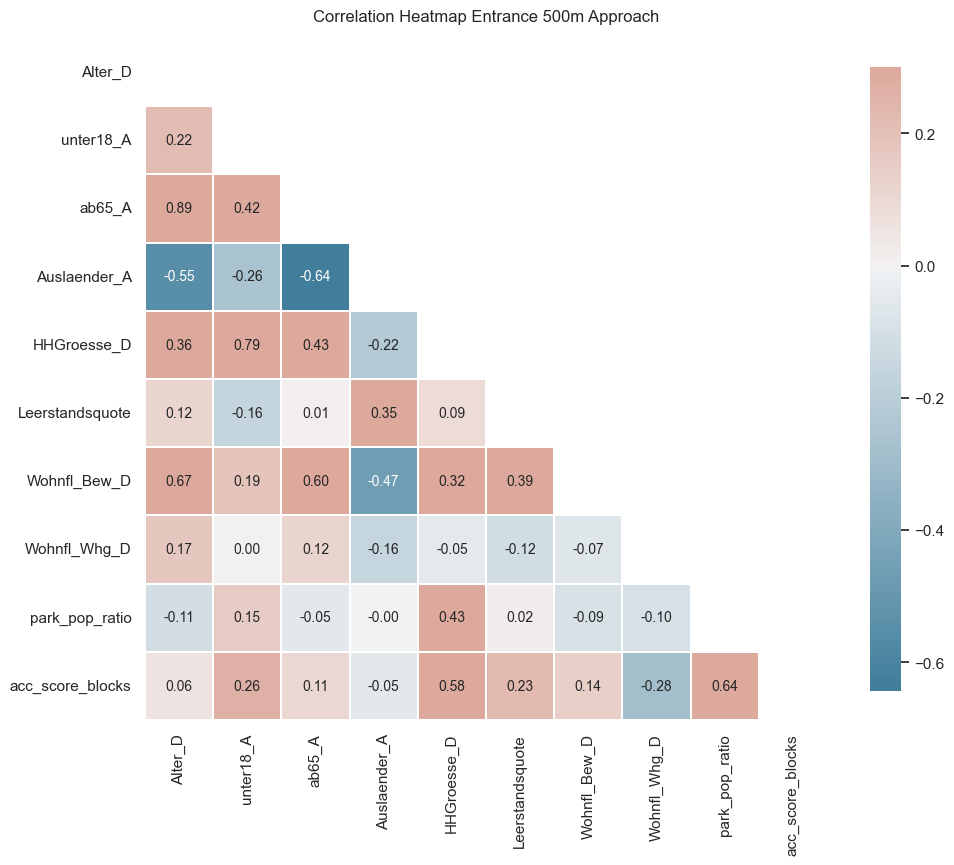

In [15]:
# entrance correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(entrance_500_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(entrance_500_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Entrance 500m Approach', fontdict={'fontsize':12}, pad=12)

### Centroid Correlation

In [16]:
centroid_500_corr_df = centroid_500_df.copy()
centroid_500_corr_df = centroid_500_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2"])

In [17]:
centroid_500_corr = centroid_500_corr_df.corr()

Text(0.5, 1.0, 'Correlation Heatmap Centroid 500m Approach')

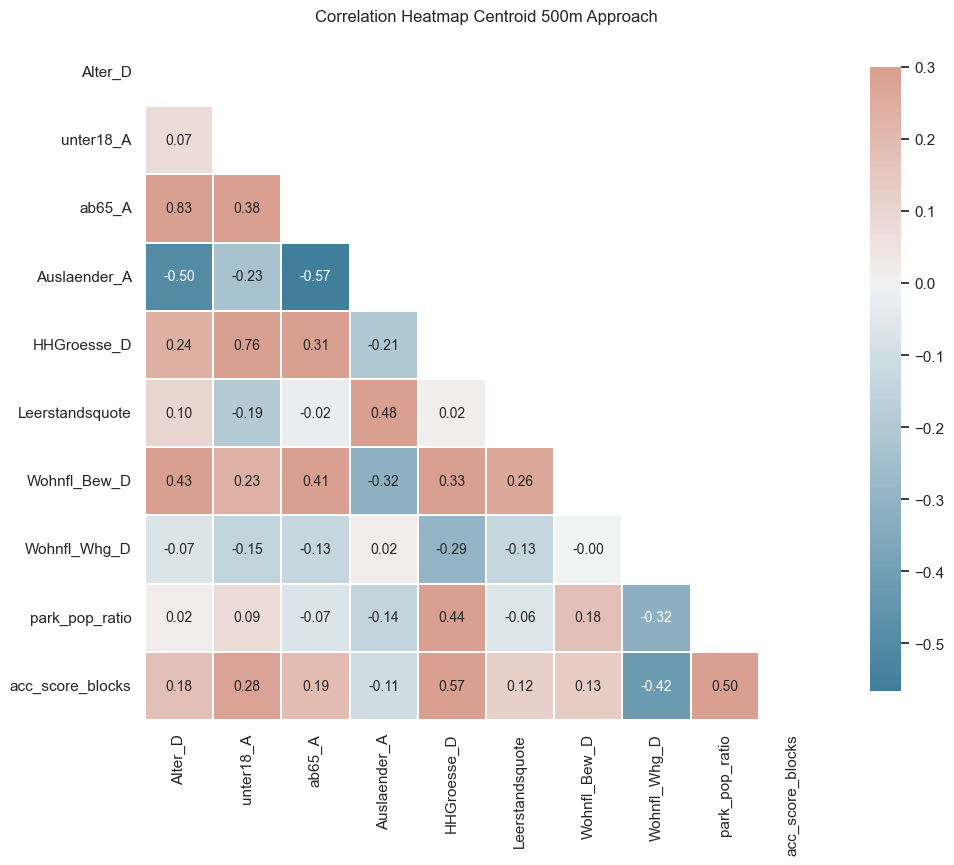

In [18]:
# centroid correlation matrix
sns.set_theme(style="white")
mask = np.triu(np.ones_like(centroid_500_corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(centroid_500_corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot = True, fmt='.2f', annot_kws={"size": 10},
            square=True, linewidths=.3, cbar_kws={"shrink": .9})
heatmap.set_title('Correlation Heatmap Centroid 500m Approach', fontdict={'fontsize':12}, pad=12)

## Summary 500m for all

In [19]:
pop_entrance_500 = entrance_500_df["Einwohner"].sum()
pop_centroid_500 = centroid_500_df["Einwohner"].sum()
centroid_500_corr_score = centroid_500_corr_df.corr()[["acc_score_blocks"]]
entrance_500_corr_score = entrance_500_corr_df.corr()[["acc_score_blocks"]]
entrance_500_corr_score = entrance_500_corr_score.rename({"acc_score_blocks": "entrance_approach"}, axis = 'columns')
centroid_500_corr_score = centroid_500_corr_score.rename({"acc_score_blocks": "centroid_approach"}, axis = 'columns')

summary_500 = centroid_500_corr_score.join(entrance_500_corr_score)
print("Summary 500m walking distance for all")
print("_____________________________________________")
print(f"Population Centroid Approach: {pop_centroid_500}")
print(f"Population Entrance Approach: {pop_entrance_500}")
summary_500

Summary 500m walking distance for all
_____________________________________________
Population Centroid Approach: 245409.391993026
Population Entrance Approach: 581778.4359629829


centroid_approach  entrance_approach
Alter_D                    0.178265           0.058356
unter18_A                  0.283386           0.263289
ab65_A                     0.193729           0.107585
Auslaender_A              -0.109072          -0.051757
HHGroesse_D                0.568191           0.577157
Leerstandsquote            0.117832           0.230164
Wohnfl_Bew_D               0.134743           0.139562
Wohnfl_Whg_D              -0.424705          -0.282826
park_pop_ratio             0.503702           0.637073
acc_score_blocks           1.000000           1.000000

## Map Definitions

In [20]:
def map_one_park_polygons(park_df,park_name,census):
    park = park_df[park_df.name == park_name]
    map = folium.Map(location=[53.41535, 9.90225], tiles="CartoDB Positron", zoom_start=11, control_scale = True)
    for _, r in census.iterrows():
        sim_geo_ = gpd.GeoSeries(r["geometry"])
        geo_j_ = sim_geo_.to_json()
        geo_j_ = folium.GeoJson(data=geo_j_, style_function=lambda x: {"fillColor": "orange"})
        folium.Popup(r["row_number"]).add_to(geo_j_)
        geo_j_.add_to(map)
    for _, r in park.iterrows():
        sim_geo = gpd.GeoSeries(r["geometry"])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "green"})
        if 'name' in park.columns:
            folium.Popup(r["name"]).add_to(geo_j)
        geo_j.add_to(map)
    
    return map

In [21]:
def map_multiple_polygons(park,census):
    map = folium.Map(location=[53.41535, 9.90225], tiles="CartoDB Positron", zoom_start=11, control_scale = True)
    for _, r in census.iterrows():
        sim_geo_ = gpd.GeoSeries(r["geometry"])
        geo_j_ = sim_geo_.to_json()
        geo_j_ = folium.GeoJson(data=geo_j_, style_function=lambda x: {"fillColor": "orange"})
        if 'row_number' in census.columns:
            folium.Popup(r["row_number"]).add_to(geo_j_)
        geo_j_.add_to(map)
    for _, r in park.iterrows():
        sim_geo = gpd.GeoSeries(r["geometry"])
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "green"})
        if 'name' in park.columns:
            folium.Popup(r["name"]).add_to(geo_j)
        geo_j.add_to(map)
    
    return map

In [22]:
def map_catchment_heatmap(park, catchment_area, park_name, census, sociodemographics):
    map = folium.Map(location=[53.554831, 10.000305], tiles="CartoDB Positron", zoom_start=11, control_scale = False)
    
    # buffering arround park catchment area to get nearest census blocks
    catchment_park_df = catchment_area[catchment_area["name"] == park_name].reset_index()
    park_3395 = catchment_park_df.to_crs(epsg=3395)
    bbox_park = park_3395.buffer(1720,cap_style = 1)

    # convert buffered polygon back to 4326 crs
    envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bbox_park))
    bbox_4326 = gpd.GeoDataFrame(envgdf, crs='EPSG:3395')
    bbox_4326 = bbox_4326.to_crs(epsg=4326)
    bbox_4326["name"] = catchment_park_df["name"]
    bbox_4326

    # find subset of census blocks intersecting with buffered catchment area
    intersecting_blocks = gpd.sjoin(census,bbox_4326,how = "inner", predicate="intersects")

    # convert census df to GeoJSON
    census_gjson = intersecting_blocks.to_json()

    # create choropleth and add to map
    folium.Choropleth(
        geo_data = census_gjson,
        name="choropleth",
        data=intersecting_blocks,
        columns =["row_number", sociodemographics],
        key_on = "feature.properties.row_number",
        fill_color="YlOrBr",
        fill_opacity=0.8,
        line_opacity=0.6,
        legend_name="Average Age"
    ).add_to(map)
    
    sozio = folium.features.GeoJson(
    intersecting_blocks, 
    control=False,
    tooltip=folium.features.GeoJsonTooltip(
        fields=[sociodemographics],
        aliases=[sociodemographics]
        ))
    
    # adding catchment area,reduced by park area to map
    park_area = park[park["name"] == park_name].reset_index()
    difference = catchment_park_df["geometry"].difference(park_area["geometry"])
    difference = folium.GeoJson(data=difference, style_function=lambda x: {"fillColor": "green","fillOpacity": 0.9, "color": "green", "stroke":True,"weight":0.5})
    
    difference.add_to(map)
    
    #map.add_child(sozio)
    map.keep_in_front(difference)
    return map

## Visualization Raster Resolution

In [23]:
census_bbox = gpd.read_file('../get_population_data/census_final_data.json',driver= 'GeoJSON')
park_catchment_areas = gpd.read_file('../get_isodistances/isodistances_entrance_park_coordinates.json',driver= 'GeoJSON')
park_areas = gpd.read_file('../get_park_data/data.json',driver= 'GeoJSON')
park_areas

name   
0                   Alsenpark  \
1    Alsterpark Klein Borstel   
2               Alstervorland   
3    Alter Botanischer Garten   
4               Alter Elbpark   
..                        ...   
118           Wesselhoeftpark   
119                Westerpark   
120  Wilhelmsburger Inselpark   
121              Wohlers Park   
122          oejendorfer Park   

                                              geometry  
0    MULTIPOLYGON (((9.94658 53.56546, 9.94651 53.5...  
1    MULTIPOLYGON (((10.02926 53.62631, 10.02915 53...  
2    MULTIPOLYGON (((10.00106 53.57307, 10.00103 53...  
3    POLYGON ((9.98821 53.56079, 9.98915 53.56009, ...  
4    MULTIPOLYGON (((9.97090 53.54780, 9.97091 53.5...  
..                                                 ...  
118  POLYGON ((9.85850 53.55248, 9.85921 53.55174, ...  
119  MULTIPOLYGON (((9.85730 53.55259, 9.85730 53.5...  
120  MULTIPOLYGON (((9.99554 53.49152, 9.99554 53.4...  
121  POLYGON ((9.95193 53.55888, 9.95197 53.55891, ...  
122  MULTIPOLYGON (((10.13732 53.55260, 10.13727 53...  

[123 rows x 2 columns]

In [24]:
map_one_park_polygons(park_catchment_areas,"Berner Gutspark",census_bbox)

In [25]:
berner_gutspark = park_catchment_areas[park_catchment_areas["name"] == "Berner Gutspark"]

In [26]:
berner_gutspark

name                                           geometry
15  Berner Gutspark  POLYGON ((10.13741 53.62463, 10.13724 53.62435...

In [27]:
berner_gutspark_3395 = berner_gutspark.to_crs(epsg=3395)
bbox_park = berner_gutspark_3395.buffer(1720, cap_style=1)
bbox_park
#berner_gutspark["geometry"] = bbox_park
#berner_gutspark

15    POLYGON ((1128379.685 7062682.006, 1128288.459...
dtype: geometry

In [28]:
envgdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(bbox_park))
bbox_4326 = gpd.GeoDataFrame(envgdf, crs='EPSG:3395')
bbox_4326 = bbox_4326.to_crs(epsg=4326)
bbox_4326["name"] = berner_gutspark["name"]
bbox_4326

geometry             name
15  POLYGON ((10.13641 53.61248, 10.13559 53.61227...  Berner Gutspark

In [29]:
map_one_park_polygons(bbox_4326,"Berner Gutspark",census_bbox)

In [30]:
intersecting_blocks = gpd.sjoin(census_bbox,bbox_4326,how = "inner", predicate="intersects")

<AxesSubplot: >

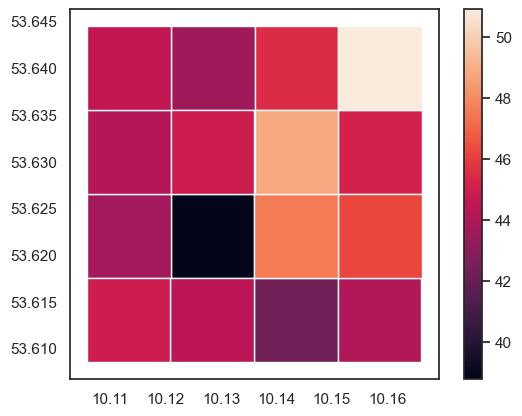

In [31]:
intersecting_blocks.plot(column= "Alter_D", legend = True)

<AxesSubplot: >

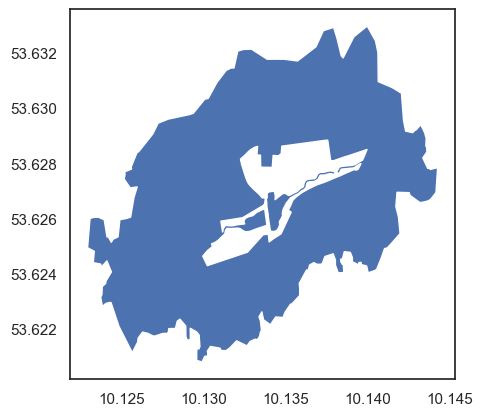

In [32]:
park_test = park_areas[park_areas["name"] == "Berner Gutspark"].reset_index()
catchment_test = park_catchment_areas[park_catchment_areas["name"] == "Berner Gutspark"].reset_index()


difference = catchment_test["geometry"].difference(park_test["geometry"])
difference.plot()


## Correlation per park size categories

In [34]:
entrance_df_500 = entrance_df[entrance_df["walk_dist"] == 500]
centroid_df_500 = centroid_df[centroid_df["walk_dist"] == 500]
centroid_df_500

name    Einwohner    Alter_D  unter18_A   
0                      Alsenpark  5839.597241  38.830349  14.558962  \
3       Alter Botanischer Garten   542.986926  40.359939   9.525865   
4                  Alter Elbpark  3674.001932  40.127176  11.260889   
5         Alter Friedhof Harburg  3074.978454  38.358043  15.463755   
6      Alter Friedhof Lohbruegge  2918.100704  41.754299  16.119134   
..                           ...          ...        ...        ...   
109          Walter-Moeller-Park  5262.263435  39.428278  13.325305   
111  Wandsbeker Muehlenteichpark  3334.804737  40.821975   9.383599   
113                 Wehbers Park  5693.124994  39.243227  12.798316   
114              Wesselhoeftpark   494.563784  47.657387  16.520964   
117                 Wohlers Park  4865.870245  37.534191  15.259237   

        ab65_A  Auslaender_A  HHGroesse_D  Leerstandsquote  Wohnfl_Bew_D   
0    12.451697     18.851374     1.854181         0.925550     33.992604  \
3    14.007745     21.981760     1.620717         2.291599     34.349430   
4    12.798399     18.316414     1.673073         1.334792     36.720561   
5    13.989364     25.029960     1.812037         1.958157     33.578990   
6    19.213944     11.734296     1.872089         1.148398     36.145859   
..         ...           ...          ...              ...           ...   
109  13.004942     18.758572     1.754809         1.093326     34.390918   
111  16.030211     11.234834     1.508989         0.913269     37.703881   
113  12.188507     12.817381     1.725108         1.041139     37.375890   
114  31.515127      7.514338     2.110112         2.615005     53.002648   
117   9.884102     17.456221     1.877315         1.739626     34.554899   

     Wohnfl_Whg_D  census_blocks  size_ha  walk_dist  size_m2  park_pop_ratio   
0       61.139524              2   1.6005        500    16005        2.740771  \
3       60.016477              2   7.9442        500    79442      146.305548   
4       58.999285              4   5.0377        500    50377       13.711751   
5       57.536692              4   6.1387        500    61387       19.963392   
6       65.479753              3   2.0620        500    20620        7.066240   
..            ...            ...      ...        ...      ...             ...   
109     58.085256              4   3.3361        500    33361        6.339667   
111     55.014214              4   2.5066        500    25066        7.516482   
113     61.960901              4   3.1201        500    31201        5.480470   
114      0.000000              2   4.6759        500    46759       94.545944   
117     60.835425              3   4.6891        500    46891        9.636714   

     acc_score_blocks  
0            1.370386  
3           50.000000  
4            3.427938  
5            4.990848  
6            2.355413  
..                ...  
109          1.584917  
111          1.879121  
113          1.370117  
114         47.272972  
117          3.212238  

[90 rows x 16 columns]

In [48]:
def correlation_calculation(df_entrance, df_centroid, walk_dist, acreage):
    # calculation of Pearson Correlation for entrance approach
    entrance_corr_df = df_entrance.copy()
    entrance_corr_df = entrance_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])
    entrance_corr_score = entrance_corr_df.corr()[["acc_score_blocks"]]
    entrance_corr_score = entrance_corr_score.rename({"acc_score_blocks": "entrance_approach"}, axis = 'columns')

    # calculation of Pearson Correlation for entrance approach
    centroid_corr_df = df_centroid.copy()
    centroid_corr_df = centroid_corr_df.drop(columns= ["name", "Einwohner","size_ha","census_blocks","size_m2","walk_dist"])
    centroid_corr_score = centroid_corr_df.corr()[["acc_score_blocks"]]
    centroid_corr_score = centroid_corr_score.rename({"acc_score_blocks": "centroid_approach"}, axis = 'columns')
    
    # sum of catchment areas population
    pop_entrance = df_entrance["Einwohner"].sum()
    pop_centroid = df_centroid["Einwohner"].sum()
    

    summary = centroid_corr_score.join(entrance_corr_score)
    summary["difference"] = summary["centroid_approach"]-summary["entrance_approach"]
    print(f"Summary only parks with walking distance of {walk_dist}m and acreage of {acreage} ha")
    print("_____________________________________________")
    print(f"Population Centroid Approach: {pop_centroid}")
    print(f"Population Entrance Approach: {pop_entrance}")
    
    return summary
    

In [49]:
correlation_calculation(entrance_df_500, centroid_df_500, "500", "< 10")

Summary only parks with walking distance of 500m and acreage of < 10 ha
_____________________________________________
Population Centroid Approach: 215869.83312282318
Population Entrance Approach: 451953.99753089563


centroid_approach  entrance_approach  difference
Alter_D                    0.257819           0.120676    0.137143
unter18_A                  0.208639           0.290555   -0.081916
ab65_A                     0.268917           0.119581    0.149336
Auslaender_A               0.011415           0.082125   -0.070710
HHGroesse_D                0.472679           0.531505   -0.058825
Leerstandsquote            0.275999           0.261372    0.014627
Wohnfl_Bew_D               0.218991           0.191779    0.027212
Wohnfl_Whg_D              -0.508061          -0.389810   -0.118251
park_pop_ratio             0.521346           0.608287   -0.086941
acc_score_blocks           1.000000           1.000000    0.000000

In [45]:
entrance_df_1000 = entrance_df[entrance_df["walk_dist"] == 1000]
centroid_df_1000 = centroid_df[centroid_df["walk_dist"] == 1000]

In [50]:
correlation_calculation(entrance_df_1000, centroid_df_1000, "1000", "> 10")

Summary only parks with walking distance of 1000m and acreage of > 10 ha
_____________________________________________
Population Centroid Approach: 140922.36021270714
Population Entrance Approach: 348871.11693680356


centroid_approach  entrance_approach  difference
Alter_D                   -0.107542           0.044072   -0.151614
unter18_A                 -0.256740           0.139088   -0.395828
ab65_A                    -0.215313           0.000564   -0.215877
Auslaender_A              -0.370897          -0.332534   -0.038363
HHGroesse_D                0.464604           0.734666   -0.270062
Leerstandsquote           -0.048391           0.396317   -0.444708
Wohnfl_Bew_D               0.263811           0.142386    0.121425
Wohnfl_Whg_D              -0.091509          -0.003547   -0.087963
park_pop_ratio             0.704750           0.956478   -0.251728
acc_score_blocks           1.000000           1.000000    0.000000